In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import arviz as az

In [2]:
from sim.dy.model_intv import ModelIntv
import sim.dy.keys as I

In [3]:
out_path = f'out/dy_ladd'

In [4]:
pars_post = json.load(open(f'{out_path}/Post.json', 'r'))

In [5]:
m = ModelIntv(year0=1970)

In [6]:
p0 = pars_post[0]

y1, p1 = m.find_baseline(p0, 2022)

_, ms0, _ = m.simulate_onward(y1, p1, intv={'FullACF': {'Coverage': 0.4}}, polished=True)

In [12]:
idx = ['Pop', 'IncR', 'MorR'] + [c for c in ms.columns if c.startswith('ACF_Plain') or c.startswith('ACF_Vul')]

ms = ms[idx].reset_index().assign(Key = i, Coverage=k, p_comorb=pars['p_comorb'], rr=pars['rr_risk_comorb'])
mss.append(ms)

ms_stats = {'Key': i, 'Coverage': k, 'Pop0': ms.Pop.iloc[0]}

for key in idx[1:]:
    ms_stats[key] = (ms[key] * ms.Pop).sum() * 0.5

mss_stats.append(ms_stats)

Time
2022.0    0.0
2022.5    0.0
2023.0    0.4
2023.5    0.4
2024.0    0.4
2024.5    0.4
2025.0    0.4
2025.5    0.4
2026.0    0.4
2026.5    0.4
2027.0    0.4
2027.5    0.4
2028.0    0.4
2028.5    0.4
2029.0    0.4
2029.5    0.4
2030.0    0.4
2030.5    0.4
2031.0    0.4
Name: ACF_Footfall, dtype: float64

<AxesSubplot:xlabel='Time'>

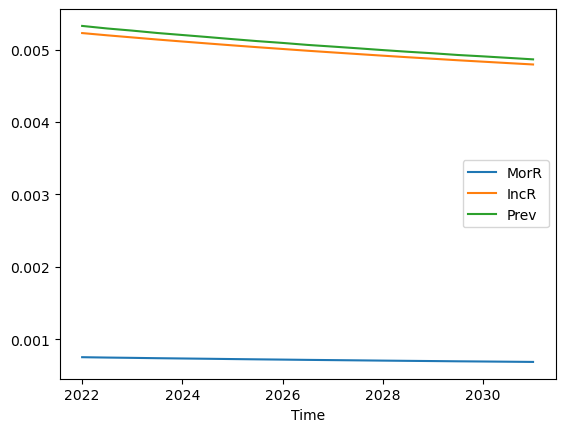

In [49]:
ms0[['MorR', 'IncR', 'Prev']].plot()